<a href="https://colab.research.google.com/github/Awantika3/DScode/blob/master/News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## COVID19 News Statistical and Sentiment Analysis 

During this adverse time of pandemic where everyone is confused and scared its very important to know sentiments related to the news, as it impacts the reader's mind and emotions. In this project, I tried to analyze COVID19 news titles and the sentiments related to it. 

Dataset: https://www.kaggle.com/ryanxjhan/cbc-news-coronavirus-articles-march-26?select=news.csv

In [0]:
import numpy as np 
import pandas as pd 
import re
import nltk
import gensim
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import itertools
import collections
%matplotlib inline

In [0]:
news = pd.read_csv('news.csv')

In [6]:
news.head()

,Unnamed: 0,authors,title,publish_date,description,text,url
0,0,[],'More vital now:' Gay-straight alliances go vi...,2020-05-03 1:30,Lily Overacker and Laurell Pallot start each g...,Lily Overacker and Laurell Pallot start each g...,https://www.cbc.ca/news/canada/calgary/gay-str...
1,1,[],Scientists aim to 'see' invisible transmission...,2020-05-02 8:00,Some researchers aim to learn more about how t...,"This is an excerpt from Second Opinion, a week...",https://www.cbc.ca/news/technology/droplet-tra...
2,2,['The Canadian Press'],Coronavirus: What's happening in Canada and ar...,2020-05-02 11:28,Canada's chief public health officer struck an...,The latest: The lives behind the numbers: Wha...,https://www.cbc.ca/news/canada/coronavirus-cov...
3,3,[],"B.C. announces 26 new coronavirus cases, new c...",2020-05-02 18:45,B.C. provincial health officer Dr. Bonnie Henr...,B.C. provincial health officer Dr. Bonnie Henr...,https://www.cbc.ca/news/canada/british-columbi...
4,4,[],"B.C. announces 26 new coronavirus cases, new c...",2020-05-02 18:45,B.C. provincial health officer Dr. Bonnie Henr...,B.C. provincial health officer Dr. Bonnie Henr...,https://www.cbc.ca/news/canada/british-columbi...


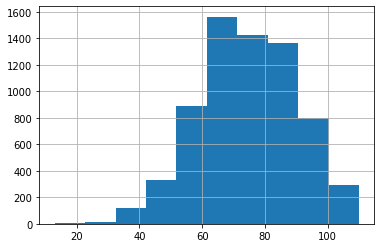

In [7]:
#Plot histogram to know news tittle range 
news['title'].str.len().hist()

The histogram shows that news headlines range from 10 to 110 characters and generally, it is between 25 to 55 characters.

In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
#Geting stopwords
corpus=[]
headline = news['title'].str.split()
headline = headline.values.tolist()
corpus=[word for i in headline for word in i]

In [0]:
from collections import defaultdict
dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

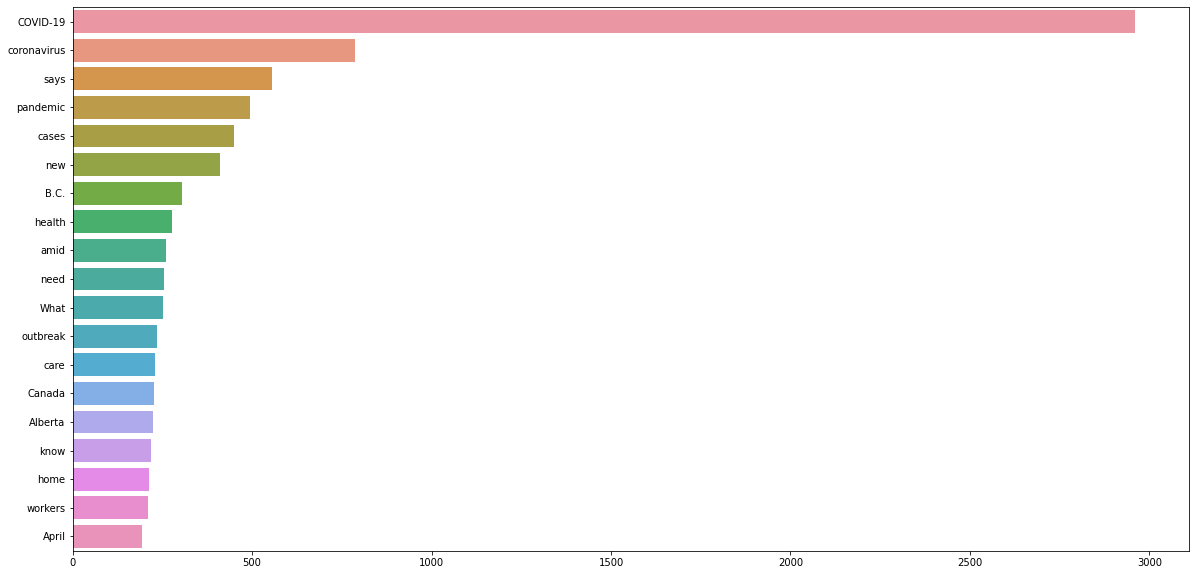

In [11]:
#Plot words other than stop words that most appear in titles
import collections
counter = collections.Counter(corpus)
most = counter.most_common()
x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
fig = sns.barplot(x=y,y=x)

In the graph above it can be observed that the only country which appeared in news title frequently is Canada, because of which the names like B.C which I suppose is British Columbia and Alberta can also be seen in the list. Alberta has the third-most number of cases of COVID-19 in Canada and a number of cases in  British Columbia also high. The titles which contain measures taken by the government to prevent the spread also mention these two names, hence there frequency is high. 

In [12]:
#Tokenize, remove stopwords and lemmatize (basically clean data)
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
def clean_news(df):
    corpus=[]
    ps = PorterStemmer()
    lem = WordNetLemmatizer()
    for news in df['title']:
        words = [w for w in word_tokenize(news) if (w not in stop)]
        words = [lem.lemmatize(w) for w in words if len(w)>2]
        corpus.append(words)
    return corpus
corpus = clean_news(news)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


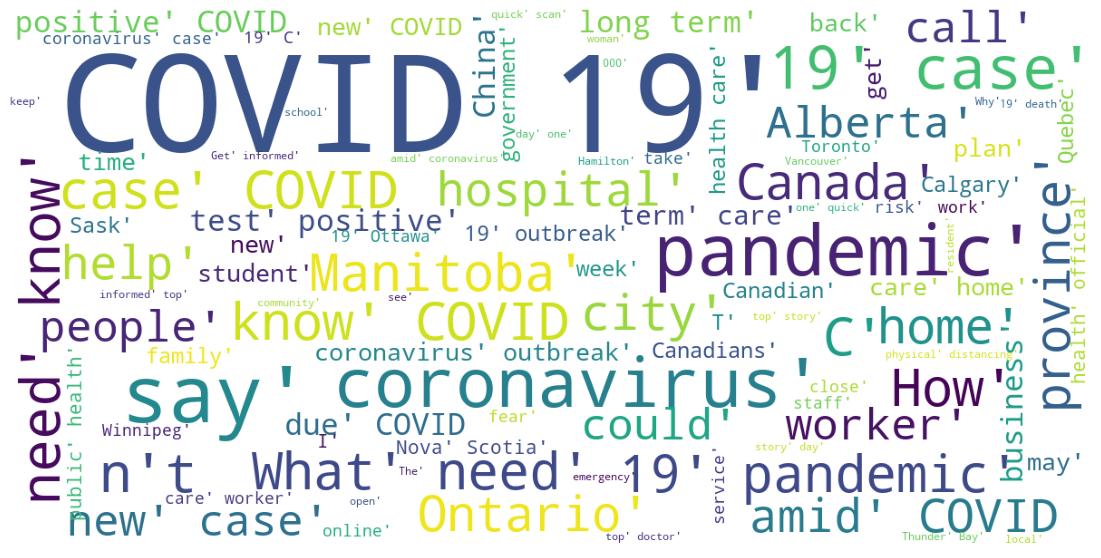

In [13]:
#Plot word cloud 
stopwords = set(STOPWORDS)
def show_wordcloud(data):
    wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, max_words = 100, max_font_size = 50, scale = 3, random_state = 1)
    wordcloud = wordcloud.generate(str(data))
    fig = plt.figure(1, figsize = (20, 10))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(corpus)

In [0]:
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [12]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics = 3, id2word = dic, passes = 10, workers = 2)
lda_model.show_topics()

[(0,
  '0.059*"COVID-19" + 0.016*"case" + 0.016*"say" + 0.015*"pandemic" + 0.010*"new" + 0.009*"coronavirus" + 0.008*"home" + 0.007*"health" + 0.007*"test" + 0.006*"Manitoba"'),
 (1,
  '0.012*"coronavirus" + 0.011*"pandemic" + 0.009*"one" + 0.009*"Canada" + 0.008*"top" + 0.008*"day" + 0.006*"distancing" + 0.006*"story" + 0.005*"Coronavirus" + 0.005*"informed"'),
 (2,
  '0.063*"COVID-19" + 0.012*"What" + 0.011*"need" + 0.010*"B.C" + 0.009*"say" + 0.008*"know" + 0.007*"coronavirus" + 0.007*"Ottawa" + 0.007*"April" + 0.007*"case"')]

The first cluster shows something realted to COVID19 new cases, health and test.

Second shows something about CORONA in Canada 

Third is something about what needs to know and canada states. 

It will be more clear when ploted in graph 

In [0]:
!pip install pyldavis

In [13]:
import pyLDAvis
from pyLDAvis import gensim 
pyLDAvis.enable_notebook()
play = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
play

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.073509  0.110604       1        1  43.377487
2     -0.090733 -0.103133       2        1  35.714943
1      0.164242 -0.007471       3        1  20.907570, topic_info=          Term         Freq        Total Category  logprob  loglift
31    COVID-19  2811.000000  2811.000000  Default  30.0000  30.0000
4     pandemic   509.000000   509.000000  Default  29.0000  29.0000
15        What   250.000000   250.000000  Default  28.0000  28.0000
398       need   230.000000   230.000000  Default  27.0000  27.0000
397       know   174.000000   174.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
348     doctor    39.571205   131.863403   Topic3  -5.7215   0.3614
35         say    59.770229   653.976440   Topic3  -5.3091  -0.8275
253     worker    45.391579   246.222595   Topic3  -5.5843  -0.1259
1426      Nova    34.070984    95.972870   Topic3  -5.8711   0.5294
1427    Scotia    33.294296    86.528542   Topic3  -5.8942   0.6100

[235 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
641       1  0.944808      'll
396       2  0.907248     2020
396       3  0.081246     2020
2215      1  0.969297      Air
325       1  0.431517  Alberta
...     ...       ...      ...
253       2  0.296480   worker
253       3  0.182761   worker
18        1  0.016354    world
18        2  0.032708    world
18        3  0.964898    world

[375 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

First cirle 

In [0]:
!pip install -U spacy[cuda92]

In [0]:
#Named Entity Recognition
import spacy
spacy.prefer_gpu()
nlp = spacy.load("en_core_web_sm")
def ner(text):
    doc = nlp(text)
    return [X.label_ for X in doc.ents]
ent = news['title'].apply(lambda x : ner(x))
ent = [x for sub in ent for x in sub]
import collections
counter = collections.Counter(ent)
count = counter.most_common()

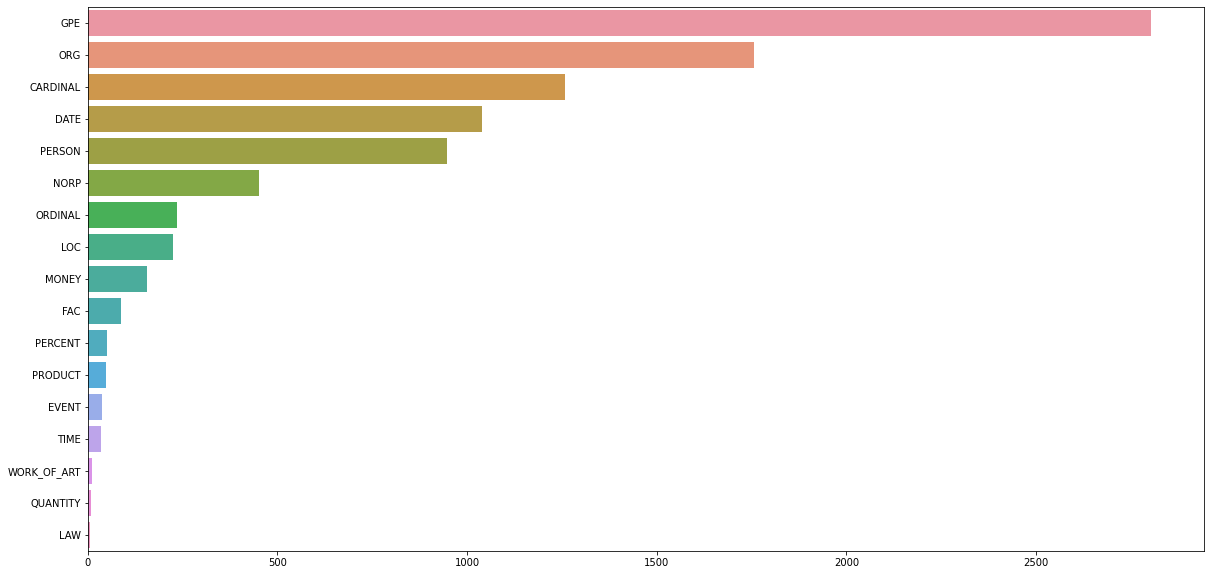

In [16]:
#Plot NER 
x,y = map(list,zip(*count))
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize = fig_dims)
fig = sns.barplot(x = y, y = x)

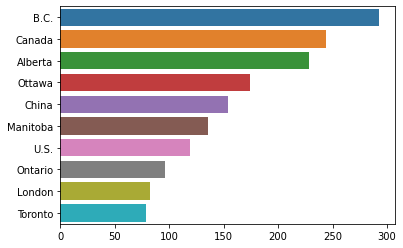

In [17]:
#Plot GPE distribution 
def ner(text, ent = "GPE"):
    doc = nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]
gpe = news['title'].apply(lambda x: ner(x))
gpe = [i for x in gpe for i in x]
counter = collections.Counter(gpe)
x,y = map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

#Sentiment analysis

In [0]:
# Define a function which can be applied to calculate the score for the title coloum
from textblob import TextBlob
def polarity(headline):
  return TextBlob(headline).sentiment.polarity
news['polarity_score'] = news['title'].apply(lambda x : polarity(x))

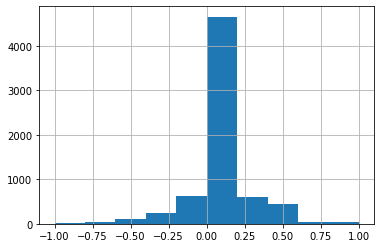

In [19]:
news['polarity_score'].hist()

Most of the news titles lies in range 0 to 0.25, means majority of news titles are neutral.

In [0]:
#Sentiment Distribution
def sentiment(x):
    if x<0:
        return 'negative'
    elif x==0:
        return 'neutral'
    else:
        return 'positive'
news['polarity']=news['polarity_score'].map(lambda x: sentiment(x))

<BarContainer object of 3 artists>

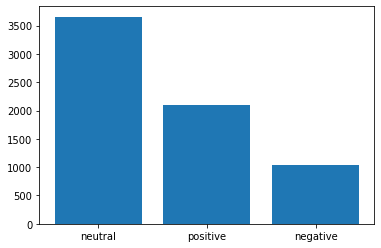

In [24]:
plt.bar(news.polarity.value_counts().index, news.polarity.value_counts())

**Conclusion:**  Most of the news titles were related to Canada. The spread of COVID19 there and the majors took by the government. This project shows a variety of new and uncommon data exploration methods.

Reference: https://colab.research.google.com/drive/1y9nmKtW0M3R4Oeu5KYgEptY6lP-QCggp#scrollTo=GNa0yhULsZeU


